In [1]:
import torch
import sklearn
import torch.nn as nn
import pandas as pd

from AtomMapping import init_AtomMapper, get_atom_map, clean_reactant_map

iteration = 5
sample_from = 'Shuan'
dataset = 'USPTO_50K'
device = torch.device('cuda:0')

model, graph_function, accepted_templates = init_AtomMapper(dataset, sample_from, iteration, device)
mapping_setting = {'neighbor_weights': 1, 'seen_templates': [], 'map_trials': 1, 'device':device, 'fix_mapping': False}

Using backend: pytorch


In [2]:
# Examples from http://rxnmapper.ai/demo.html
rxn_dict = {
    'Thioether_synthesis': 'CC(C)S.CN(C)C=O.Fc1cccnc1F.O=C([O-])[O-].[K+].[K+]>>CC(C)Sc1ncccc1F',
    'Grignard_reaction': 'CCOCC.C[Mg+].O=Cc1ccc(F)cc1Cl.[Br-]>>CC(O)c1ccc(F)cc1Cl',
    'Morpholine_synthesis': 'BrCCOCCBr.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.NCC(F)(F)CO>>OCC(F)(F)CN1CCOCC1',
    'Diels_Alder': 'C1=CCC=C1.O=C1C=CC(=O)C1>>O=C1CC(=O)C2C3C=CC(C3)C12',
    'Claisen_Rearrangement': 'OC1C=CC=CC=1C(C=C)(C)C>>C1=CC=C(OCC=C(C)C)C=C1',
       }

Reaction Template: [S:1].F-[c:2]>>[S:1]-[c:2]
Is confident prediction? True
Prediction heatmap:


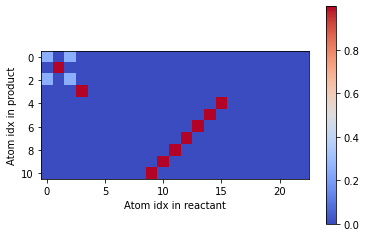

In [3]:
rxn_name = 'Thioether_synthesis'
rxn = rxn_dict[rxn_name]
prediction = get_atom_map(model, graph_function, mapping_setting, rxn)

print ('Reaction Template:', prediction['template'])
print ('Is confident prediction?', prediction['template'] in accepted_templates)
print ('Prediction heatmap:')
mapper = prediction['mapper']
mapper.plot_prediction()

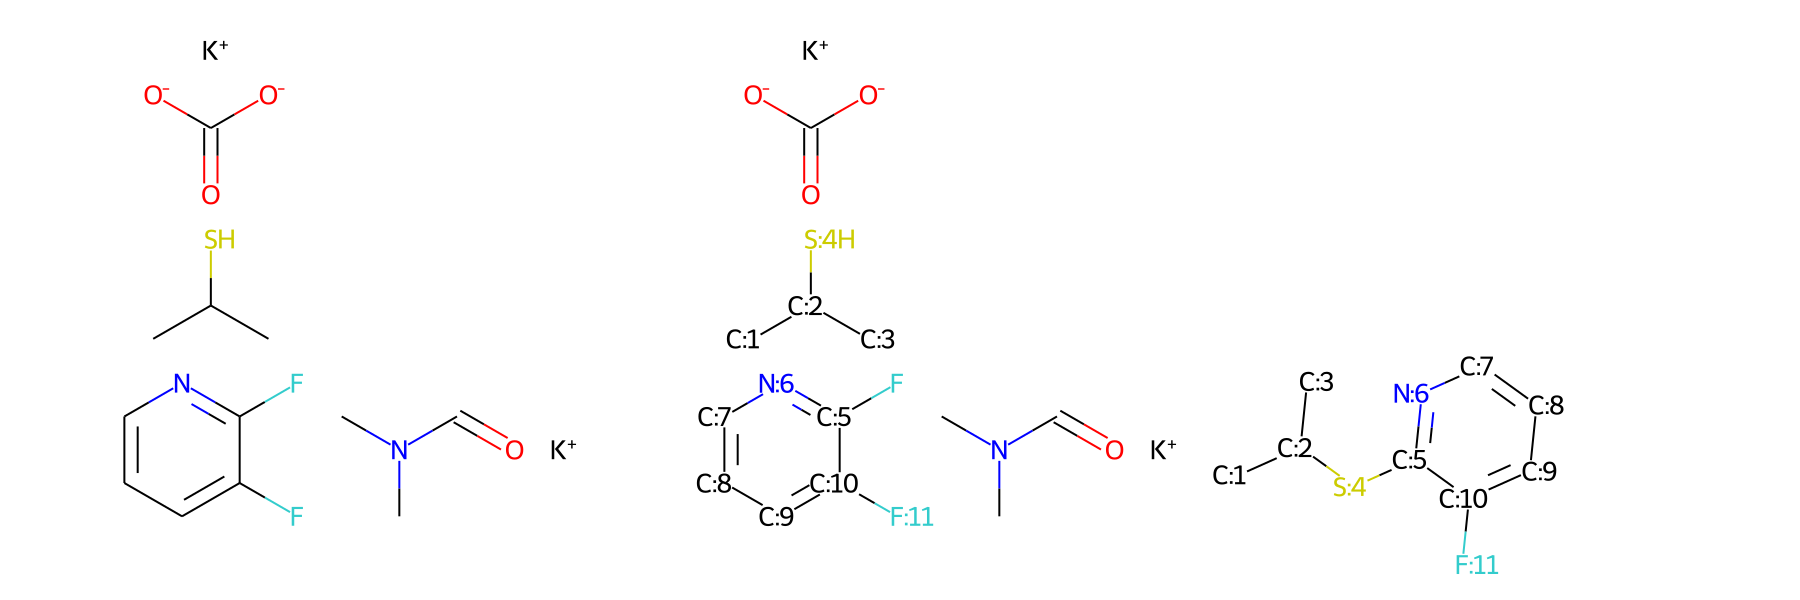

In [4]:
from rdkit import Chem
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in [rxn.split('>>')[0]]+prediction['mapped_rxn'].split('>>')], subImgSize = (600, 600))

In [5]:
mapper.map_steps

,4,6,2,5,10,7,8,9,11,1,3
product_idx,3,5,1,4,9,6,7,8,10,0,2
reactant_idx,3,14,1,15,10,13,12,11,9,0,2
score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
